## Introducción

En el siguiente proyecto, se ha recibido una base de datos histórica de una empresa logística, además se nos ha propuesto una serie problematicas a resolver. Con ayuda de la manipulación y el análisis de los datos, buscaremos extraer información importante, que nos a yudará a resolver los problemas. El documento está organizado por problemática, y se explica paso a paso cómo se resolvió, la primera sección únicamente abarca la carga y exploración de los datos. Al final del documento, se presenta una solución propuesta y una conclusión del proyecto

Link de github: 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Cargar la bd y exploración de datos

In [2]:
route = 'synergy_logistics_database.csv'

database = pd.read_csv(route, index_col='register_id')

Como parte de la exploración, lo primero que hacemos es imprimir los primeros 5 registros y lo 5 últimos para saber cómo vienen los datos y saber de un vistazo lo que podemos encontrar

In [3]:
database

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000
...,...,...,...,...,...,...,...,...,...
19052,Imports,Japan,Singapore,2020,27/06/20,Gas turbines,Sea,Union Energy Co,1000000
19053,Imports,Malaysia,Singapore,2020,28/06/20,Gas turbines,Sea,Union Energy Co,2000000
19054,Imports,Malaysia,Singapore,2020,29/06/20,Gas turbines,Sea,Union Energy Co,33000000


Posteriormente, observamos a detalle las columnas y sus tipos de datos, podemos observar que las columnas que contienen `strings` vienen como tipo **object**

In [4]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19056 entries, 1 to 19056
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   direction       19056 non-null  object
 1   origin          19056 non-null  object
 2   destination     19056 non-null  object
 3   year            19056 non-null  int64 
 4   date            19056 non-null  object
 5   product         19056 non-null  object
 6   transport_mode  19056 non-null  object
 7   company_name    19056 non-null  object
 8   total_value     19056 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.5+ MB


## 10 Rutas más demandadas

Enseguida, vamos a realizar el análisis para contestar a las preguntas: 
<ul>
    <li>¿cuáles son las 10 mejores rutas?</li>
    <li>¿le conviene implementar esa estrategia?</li> 
    <li>¿porqué?. </li>
</ul>
Tomaremos como las mejores rutas aquellas con mayor actividad, por lo que tomaremos como referencia a la columna `total_value`,  sin diferenciar importaciones de exportaciones

In [5]:
rutas_df = database[['origin','destination','total_value']]
rutas_df

,origin,destination,total_value
register_id,,,
1,Japan,China,33000000
2,Japan,China,16000000
3,Japan,China,29000000
4,Japan,China,14000000
5,Japan,China,17000000
...,...,...,...
19052,Japan,Singapore,1000000
19053,Malaysia,Singapore,2000000
19054,Malaysia,Singapore,33000000


El siguiente paso es combinar las columnas `origin` y `destination` para tener una sola clave que nos indique la ruta

Definimos una función que combina en un string, los valores de ambas columnas

In [6]:
#Al aplicar la función apply sobre un df, junto con el parámetro axis = 1, y una función, nos enviará a la función cada una de las filas del df y nos devolverá una serie con cada uno de los valores devueltos por la función
def junta_ruta(fila):
    return f"{fila['origin']}-{fila['destination']}"

Aplicamos dicha función a cada renglón de `rutas_df` y creamos una nueva columna añadiéndola al dataframe que ya teníamos

In [7]:
rutas_df['route'] = rutas_df.apply(junta_ruta, axis = 1)

<ipython-input-7-0c9e8fc8432c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rutas_df['route'] = rutas_df.apply(junta_ruta, axis = 1)


Como ya no necesitamos las columnas mezcladas, recortamos el DataFrame para teneer únicamente `route` y `total_value`

In [8]:
rutas_df = rutas_df[['route', 'total_value']]
print(rutas_df)

                          route  total_value
register_id                                 
1                   Japan-China     33000000
2                   Japan-China     16000000
3                   Japan-China     29000000
4                   Japan-China     14000000
5                   Japan-China     17000000
...                         ...          ...
19052           Japan-Singapore      1000000
19053        Malaysia-Singapore      2000000
19054        Malaysia-Singapore     33000000
19055        Malaysia-Singapore     13000000
19056        Malaysia-Singapore     30000000

[19056 rows x 2 columns]


Analizamos las claves que acabamos de obtener con la función `unique()`. Sin embargo, podemos observar algo interesante que puede afectar el análisis. Si tomamos en cuenta que una ruta es la mísma no importando la dirección, podemos observar que algunas se repiten, por ejemplo: Mexico-Japon, sería lo mísmo que Japon-Mexico en este particular análisis, por lo tanto debemos buscar una manera de sumar estos valores de tal manera que sea una misma ruta

In [9]:
print(rutas_df.route.unique())

['Japan-China' 'Japan-USA' 'Japan-South Korea' 'Japan-Spain' 'Germany-USA'
 'Germany-China' 'Germany-Italy' 'China-Japan' 'China-USA' 'China-Germany'
 'China-South Korea' 'China-Mexico' 'China-Brazil' 'Italy-France'
 'Italy-Switzerland' 'Italy-United Kingdom' 'Italy-Spain' 'Italy-Croatia'
 'Italy-Ireland' 'Italy-Germany' 'USA-China' 'USA-Belgium' 'USA-Mexico'
 'USA-Brazil' 'USA-Argentina' 'USA-Singapore' 'USA-Canada'
 'Russia-Netherlands' 'Russia-Germany' 'Russia-Belorussia' 'Russia-China'
 'Russia-Turkey' 'Russia-India' 'Russia-France' 'Russia-South Korea'
 'Russia-Japan' 'China-Argentina' 'China-Spain' 'Japan-Switzerland'
 'Japan-Mexico' 'Japan-Singapore' 'Japan-Brazil' 'Japan-Germany'
 'South Korea-China' 'South Korea-USA' 'South Korea-Japan'
 'South Korea-Vietnam' 'South Korea-Mexico' 'USA-Netherlands'
 'Netherlands-Germany' 'Netherlands-France' 'Netherlands-Belgium'
 'France-Germany' 'France-USA' 'France-Italy' 'France-Spain'
 'France-United Kingdom' 'Germany-France' 'France-Belgi

Agrupamos por ruta y sumamos, recordar que en este punto aún hay rutas repetidas

In [10]:
rutas_agrupadas = rutas_df.groupby('route').sum()
rutas_agrupadas

,total_value
route,
Australia-Brazil,172000000
Australia-Japan,920000000
Australia-Mexico,84000000
Australia-Philippines,344000000
Australia-Singapore,493000000
...,...
United Kingdom-Ireland,584123000
United Kingdom-Italy,77000
United Kingdom-Spain,1378025000


Definimos ua función invierte una clave dada, esta función nos ayudará en la función siguiente para comparar las claves

In [11]:
def obtener_clave_inversa(clave):
    ruta = clave.split('-')
    return f"{ruta[1]}-{ruta[0]}"

#El siguiente print solo es para probar la función
print(obtener_clave_inversa('United Kingdom-USA'))

USA-United Kingdom


La siguiente función utiliza un diccionario, el cual irá generando una nueva lista, pero esta vez asegurandose que que la clave solo exista una vez, sin importar el orden, si encuentra 2 claves iguales con diferente orden, simplemente se suma el valor actual cualquiera que sea la clave en el diccionario. Esta función se apoyea de la función anterior

In [13]:
rutas_combinadas = {}

def combinar_rutas(fila):
    clave = fila.name
    clave_inversa = obtener_clave_inversa(clave)
    if clave in rutas_combinadas:
        rutas_combinadas[clave] += fila['total_value']
        return
    elif clave_inversa in rutas_combinadas:
        rutas_combinadas[clave_inversa] += fila['total_value']
        return
    else:
        rutas_combinadas[clave] = fila['total_value']
    
        
rutas_agrupadas.apply(combinar_rutas,axis = 1)

print(rutas_combinadas)

{'Australia-Brazil': 172000000, 'Australia-Japan': 920000000, 'Australia-Mexico': 84000000, 'Australia-Philippines': 344000000, 'Australia-Singapore': 493000000, 'Australia-Thailand': 337000000, 'Australia-United Kingdom': 220000000, 'Austria-France': 100000, 'Austria-Germany': 188000, 'Austria-Italy': 252000, 'Austria-Slovakia': 258000, 'Austria-Switzerland': 252000, 'Austria-USA': 112000, 'Belgium-France': 5881069000, 'Belgium-Germany': 302000000, 'Belgium-Netherlands': 3549142000, 'Belgium-United Kingdom': 2447169000, 'Brazil-Argentina': 465000000, 'Brazil-China': 1584000000, 'Brazil-Germany': 79265000, 'Brazil-Mexico': 836433000, 'Brazil-Netherlands': 462059000, 'Brazil-USA': 2656000000, 'Canada-Brazil': 206000000, 'Canada-China': 693000000, 'Canada-Japan': 810511000, 'Canada-Mexico': 8904949000, 'Canada-USA': 3969000000, 'Canada-United Kingdom': 411000000, 'China-Argentina': 1236000000, 'China-Belgium': 524000000, 'China-Germany': 7585875000, 'China-Japan': 8441000000, 'China-Mexi

Una vez que tenemo un diccionario con claves únicas que representan las rutas y cuyo valor corresponde al `total_value`, lo convertimos a DataFrame para facilitar su lectura y manipulación

In [14]:
dict_to_df = {}
dict_to_df['routes'] = list(rutas_combinadas.keys())
dict_to_df['total_value'] = list(rutas_combinadas.values())
rutas_agrupadas = pd.DataFrame(dict_to_df)
rutas_agrupadas

,routes,total_value
0,Australia-Brazil,172000000
1,Australia-Japan,920000000
2,Australia-Mexico,84000000
3,Australia-Philippines,344000000
4,Australia-Singapore,493000000
...,...,...
122,USA-United Arab Emirates,119000
123,United Kingdom-Ireland,584123000
124,United Kingdom-Spain,1378025000
125,United Kingdom-USA,111000


Ahora, simplemente ordenamos el DataFrame en orden descendente para que los primeros elementos correspondan las rutas con mayor actividad

In [15]:
rutas_agrupadas.sort_values(ascending = False, inplace = True, by='total_value')
mejores10 = rutas_agrupadas.head(10)
mejores10

,routes,total_value
33,China-Mexico,13084000000
26,Canada-Mexico,8904949000
32,China-Japan,8441000000
93,Mexico-USA,7660342000
31,China-Germany,7585875000
78,Japan-Mexico,7364000000
109,South Korea-Vietnam,6877007000
36,China-South Korea,6494000000
81,Japan-South Korea,5967000000
53,Germany-Italy,5956088000


Finalmente, graficamos para analizar mejor los datos

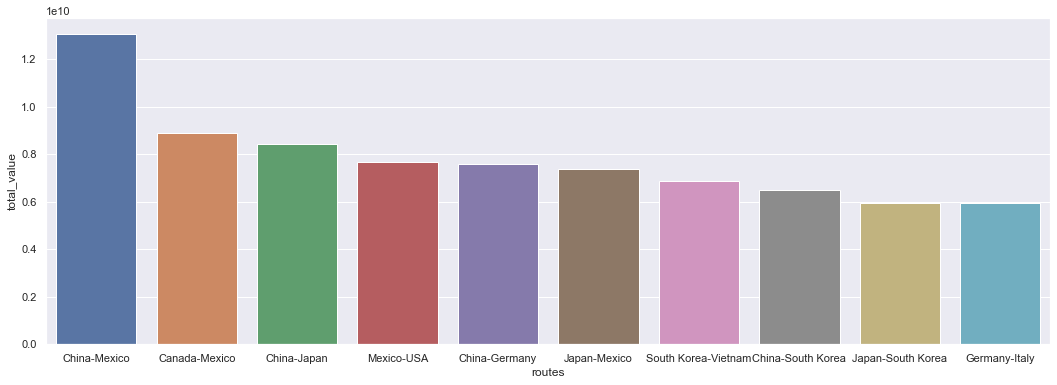

In [16]:
sns.set(rc={"figure.figsize": (18, 6)})  #width=18, height=6
sns.barplot(data=mejores10, x='routes', y='total_value')

Algo interesante que podemos ver en la grafica es que la ruta **China-Mexico** tiene una actividad sobresaliente, mientras que las 9 restantes la diferencia va incrementando más suavemente

## Los 3 medios de transporte más importantes

Ahora, realizaremos el análisis de los datos para intentar responder las siguientes preguntas:
<ul>
<li>¿Cuáles son los 3 medios de transporte más importantes para Synergy logistics considerando el valor de las importaciones y exportaciones?</li> 
<li>¿Cuál es medio de transporte que podrían reducir? </li>
</ul>

Comenzamos por obtener sustraer las columnas `transport_mode` y `total_value` y obtener la suma nuevamente, al igual que el punto anterior, consideraremos el total_value como el referente para el valor de importaciones o exportaciones, sin embargo, ahora en función del modo de transporte

In [17]:
transportes = database[['transport_mode','total_value']].groupby('transport_mode').sum()
transportes

,total_value
transport_mode,
Air,38262147000
Rail,43628043000
Road,33270486000
Sea,100530622000


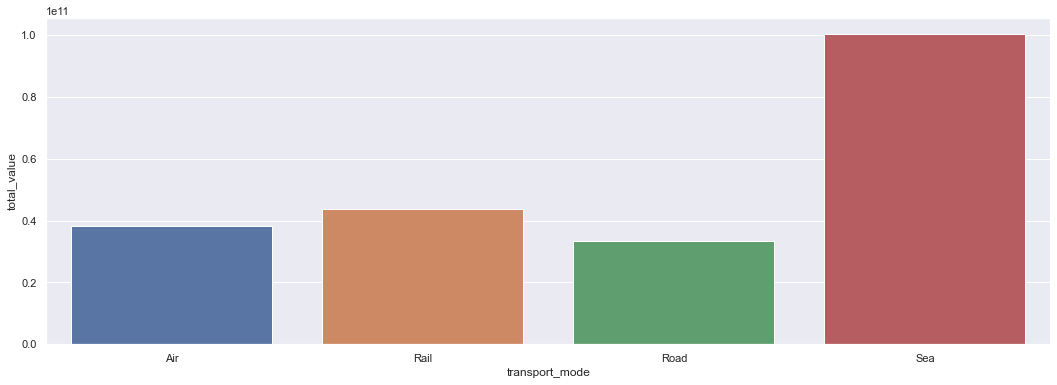

In [18]:
sns.barplot(data=transportes, x=transportes.index, y='total_value')

Nuevamente al observar la gráfica, podemos identificar que el medio de transporte **"Sea"** sobresale bastante por sobre los demás

Otro análisis que podría resultar interesante, es cómo se han comportado estos medios de transporte a lo largo del tiempo. Para lograr esto, recuperamos otro subconjunto de la base de datos, igual que el anterior, pero ahora incluimos el `año`, ahora agrupamos por ambos, `año` y `modo de transporte`

In [19]:
transportes = database[['year','transport_mode','total_value']].groupby(['year','transport_mode']).sum().reset_index()
transportes

,year,transport_mode,total_value
0,2015,Air,7023000000
1,2015,Rail,4437488000
2,2015,Road,8231077000
3,2015,Sea,11306827000
4,2016,Air,3459111000
5,2016,Rail,5479198000
6,2016,Road,4710088000
7,2016,Sea,18500041000
8,2017,Air,9065068000
9,2017,Rail,8483234000


Graficamos `año` con respecto a `valor total`

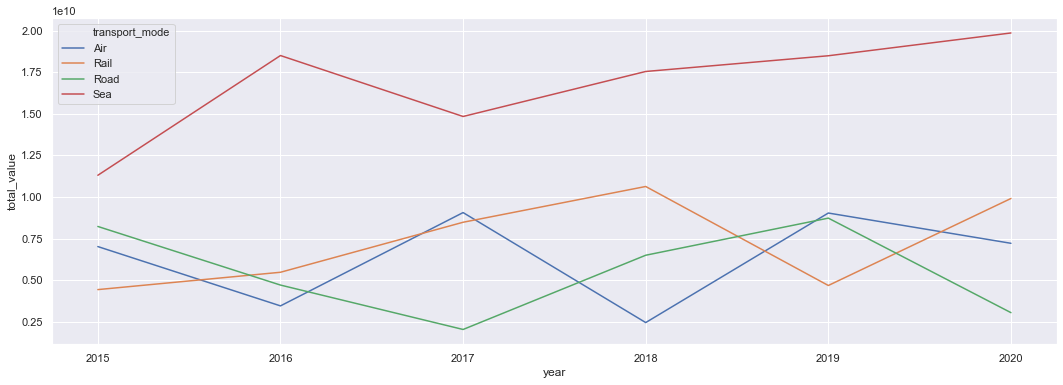

In [20]:
sns.lineplot(data=transportes, x='year', y='total_value', hue='transport_mode')

Algo interesante que podemos observar aquí, es que la el medio de transporte **"Sea"** además de ser el de mayor actividad, es el más estable e incluso va en aumento. el medio de tranporte **"Rail"** sería el que le sigue en estabilidad, el resto han tenido años demasiado bajos por lo que no sería muy recomendable apostar por ellos en el futuro

## Paises que generan el 80% de exportaciones e importaciones

Finalmente intentaremos identificar aquellos países que generan el 80% de las exportaciones e importaciones para intentar resolver las siguientes preguntas:

<ul>
    <li> ¿en qué grupo de países debería enfocar susesfuerzos?</li>
</ul>

Como en los pasos anteriores, comenzamos por seleccionar las columnas que nos interesan para nuestro análisis, en este caso `origin`, `destination` y `total_value`

In [21]:
rutas_df = database[['origin','destination','total_value']]
rutas_df

,origin,destination,total_value
register_id,,,
1,Japan,China,33000000
2,Japan,China,16000000
3,Japan,China,29000000
4,Japan,China,14000000
5,Japan,China,17000000
...,...,...,...
19052,Japan,Singapore,1000000
19053,Malaysia,Singapore,2000000
19054,Malaysia,Singapore,33000000


Como vamos a obtener porcentajes, nos será de utilidad almacenar el valor total de la columna `total_value`

In [22]:
total_exportaciones_importaciones = rutas_df['total_value'].sum()
total_exportaciones_importaciones

215691298000

Creamos una función que nos de el porcentaje de un valor con respecto al total

In [23]:
def obtener_porcentaje(valor,total):
    return (valor/total) * 100

Agrupamos por origen, ya que esto nos dará el total de exportaciones e importaciones que realiza cada país

In [24]:
paises_agrupados = rutas_df.groupby('origin').sum()
paises_agrupados

,total_value
origin,
Australia,2570000000
Austria,1155000
Belgium,2588000000
Brazil,2763000000
Canada,11253000000
China,45210046000
France,19930332000
Germany,15593233000
India,2626000000


Ordenamos en orden ascendente de modo que los primeros países representen los de mayores exportaciones e importaciones. También debemos generar una columna nueva que nos indique el porcentaje de cada país con respecto al total, para eso utilizamos la función creada anteriormente y el dato de total_value igualmente ya calculado

In [27]:
paises_agrupados.sort_values(ascending=False, by='total_value', inplace=True)
paises_agrupados['porcentajes'] = paises_agrupados.apply(lambda fila: obtener_porcentaje(fila['total_value'], total_exportaciones_importaciones),axis=1)

In [28]:
paises_agrupados

,total_value,porcentajes
origin,,
China,45210046000,20.960533
USA,23646306000,10.963032
Japan,20042976000,9.292436
France,19930332000,9.240211
South Korea,18510146000,8.581777
Germany,15593233000,7.229421
Russia,14074000000,6.525066
Canada,11253000000,5.217178
Italy,6634684000,3.076009


Para obtener aquellos países que, juntos, representan el **80%**, debemos crear otra columna que vaya acumulando los porcentajes, llegará un punto en el que se pasará del 80 y sabremos que en este momento debemos parar.

Creamos una función que vaya acumulando los porcentajes de cada fila recibida

In [31]:
acu = 0
def acumular(fila):
    global acu #Usamos una variable global porque enviaremos una función de este tipo nueva, en cada fila
    acu += fila['porcentajes']
    return acu

In [32]:
paises_agrupados['acumulado'] = paises_agrupados.apply(lambda fila: acumular(fila), axis = 1)
acu = 0 #Limpiamos esta variable por seguridad, ya que estamos usandola de forma global
paises_agrupados

,total_value,porcentajes,acumulado
origin,,,
China,45210046000,20.960533,20.960533
USA,23646306000,10.963032,31.923565
Japan,20042976000,9.292436,41.216001
France,19930332000,9.240211,50.456213
South Korea,18510146000,8.581777,59.037990
Germany,15593233000,7.229421,66.267411
Russia,14074000000,6.525066,72.792477
Canada,11253000000,5.217178,78.009656
Italy,6634684000,3.076009,81.085665


Observando la tabla nos damos cuenta que al llegar a **Italia**, es cuando se pasa del requerimiento. Vamos a crear una función que nos obtenga de forma automática aquellos países que cuyo porcentaje acumulado es menor a 80.
Esta función también usa un arreglo global en el cual irá almacenando los nombres de los países siempre y cuando se cumpla la condición

In [33]:
paises80 = []
def get_countries(fila):
    global paises80
    if fila['acumulado'] < 80:
        paises80.append(str(fila.name))

Aplicamos la función a cada fila de los países agrupados

In [34]:
#limpiar lista paises
paises80 = []
paises_agrupados.apply(lambda fila: get_countries(fila), axis = 1)
paises80


['China',
 'USA',
 'Japan',
 'France',
 'South Korea',
 'Germany',
 'Russia',
 'Canada']

Usamos la función `filter` de los DataFrames para obtener un subDataFrame con las claves obtenidas en el paso anterior

In [35]:
paises_agrupados.filter(items=paises80, axis = 0)

,total_value,porcentajes,acumulado
origin,,,
China,45210046000,20.960533,20.960533
USA,23646306000,10.963032,31.923565
Japan,20042976000,9.292436,41.216001
France,19930332000,9.240211,50.456213
South Korea,18510146000,8.581777,59.037990
Germany,15593233000,7.229421,66.267411
Russia,14074000000,6.525066,72.792477
Canada,11253000000,5.217178,78.009656


Vamos a realizar 2 gráficas de pastel para visualizar mejor los datos obtenidos, la primera gráfica mostrará una relación de los países obtenidos con el resto.
La seguna gráfica, mostrará cada país con su respectivo porcentaje

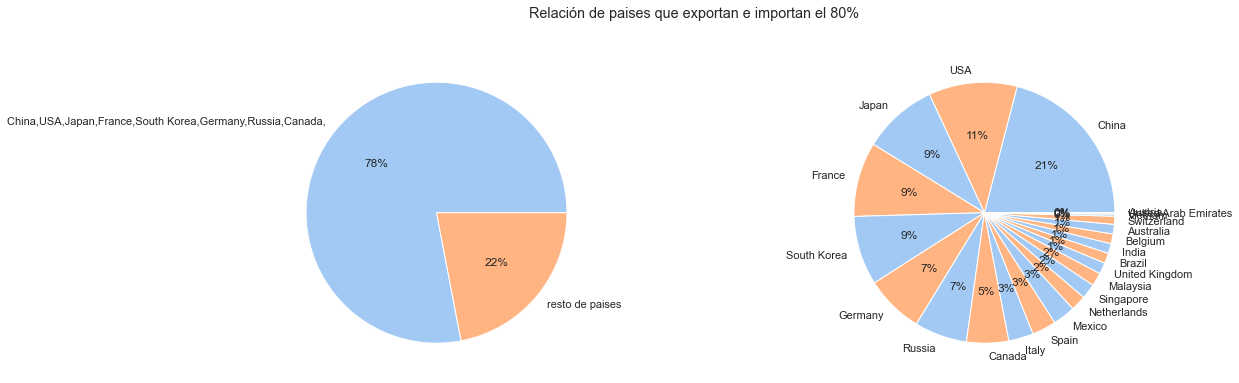

In [38]:
#Preparamos la grafica de pastel
etiqueta = ''
#Juntamos todos los países para que se vuelva una sola etiqueta para la primera gráfica
for pais in paises80:
    etiqueta += (pais + ',')

#Obtenemos el porcentaje acumulado del último elemento en el dataframe paises80, esto nos dará el máximo porcentaje que es menor que 80
porcentaje = paises_agrupados.loc[paises80[-1]]['acumulado']

#Generamos las etiquetas para la primera gráfica (La etiqueta generada y otra para el resto)
etiquetas = []
etiquetas.append(etiqueta)
etiquetas.append('resto de paises')

#Generamos los valores para la primera0 gráfica (El porcentaje obtenido y calculamos el resto)
valores = []
valores.append(porcentaje)
valores.append(100 - porcentaje)

#Obtenemos colores de seaborn
colors = sns.color_palette('pastel')[0:2]

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Relación de paises que exportan e importan el 80%')
ax1.pie(valores, labels = etiquetas, colors = colors, autopct='%.0f%%')
ax2.pie(paises_agrupados.porcentajes, labels = list(paises_agrupados.index), colors = colors, autopct='%.0f%%') #las etiquetas y los valores de la segunda gráfica son obtenidos directamente del DataFrame




plt.show()

## Estrategia sugerida

### 1

De acuerdo al análisis de los datos, las 10 rutas más demandadas son:

<ol>
    <li>China-Mexico</li>
    <li>Canada-Mexico</li>
    <li>China-Japan</li>
    <li>Mexico-USA</li>
    <li>China-Germany</li>
    <li>Japan-Mexico</li>
    <li>South Korea-Vietnam</li>
    <li>China-South Korea</li>
    <li>Japan-South Korea</li>
    <li>Germany-Italy</li>
</ol>

Según el análisis la única ruta que sobresalió fue China-Mexico, el resto fue descendiendo suavemente, por lo tanto se sugiere **No implementar esta estrategía**, la razón es que no se considera que haya mucho beneficio enfocarse solo en estas, por el contrario se estaría perdiendo del resto de la rutas

### 2

Los 3 medios de transporte más importantes según el número de exportaciones e importaciones son:
<ol>
    <li>Mar</li>
    <li>Tren</li>
    <li>Aire</li>
</ol>

Sin embargo, a pesar de que `Aire` aparece entre los mejores, gracias a un anális más exahustivo resultó ser el más inestable ya que hubo años años en los que reportó un númro bastante bajo. Por lo tanto este es le medio que se recomendaría reducir

### 3

Los países que representan aproximadamente el 80% de las exportaciones e importaciones son:
<ol>
    <li>China</li>
    <li>USA</li>
    <li>Japan</li>
    <li>France</li>
    <li>South Korea</li>
    <li>Germany</li>
    <li>Russia</li>
    <li>Canada</li>
</ol>

son estos países en los cuales debería enfocar sus esfuerzos

## Conclusión

Gracias al lenguaje de programación Python, hemos logrado extraer información muy valiosa de una base de datos la cual, en un inicio parecía muy complicada y extensa, utilizando herramientas como pandas, hemos extraido y manipulado información interesante, gracias a seaborn, hemos presentado la información desde una perspectiva diferente lo cual nos facilitó entenderla y extraer mejoers conclusiones. El uso de funciones nos ha permitido crear códgo más potente y con ello lograr análisis más profundos. Todo se ha complementado para lograr sugerir una estrategía para le empresa Synergy que, en definitiva, le ayudará a mejorar sus procesos y servicios, así como planear de una menera más inteligente hacia el futuro.